                                                    Efficientdet 

In [25]:
import tensorflow_hub as hub #library containing pre-trained models
import cv2
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [26]:
width=720
height=720
image=cv2.imread('/content/drive/MyDrive/datas/object detection/image.jpeg')
img=cv2.resize(image,(width,height))

In [27]:
#from google.colab.patches import cv2_imshow
#cv2_imshow(img)

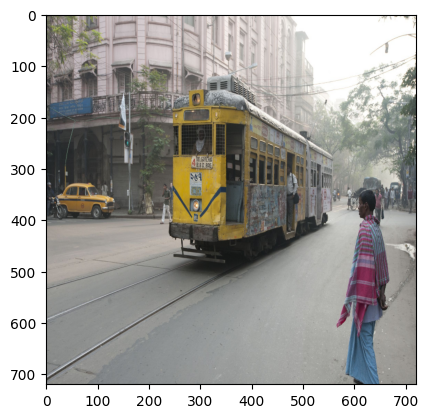

In [28]:
rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgb)

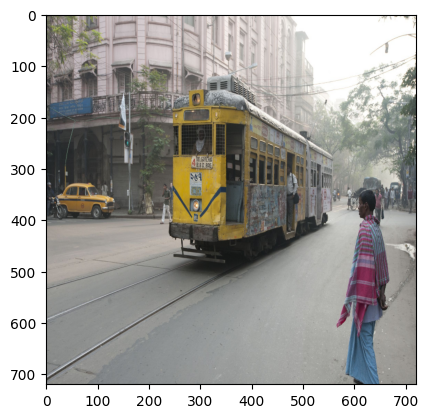

In [29]:
rgb_tensor=tf.convert_to_tensor(rgb,dtype=tf.uint8)  #convert image to tensor  #tensor images run faster in gpu
plt.imshow(rgb_tensor)

In [30]:
print(rgb_tensor.shape)
rgb_tensor=tf.expand_dims(rgb_tensor,0)#0 mean index
print(rgb_tensor.shape)

(720, 720, 3)
(1, 720, 720, 3)


In [31]:
detector=hub.load("https://tfhub.dev/tensorflow/efficientdet/lite2/detection/1") 


In [32]:
labels=pd.read_csv('/content/drive/MyDrive/datas/object detection/labels.csv',sep=';',index_col='ID')

In [33]:
labels.head()

,OBJECT (PAPER),OBJECT (2014 REL.),OBJECT (2017 REL.),SUPER CATEGORY
ID,,,,
1,person,person,person,person
2,bicycle,bicycle,bicycle,vehicle
3,car,car,car,vehicle
4,motorcycle,motorcycle,motorcycle,vehicle
5,airplane,airplane,airplane,vehicle


In [34]:
print(labels.shape)
print(labels.columns)
labels=labels['OBJECT (2017 REL.)']

(91, 4)
Index(['OBJECT (PAPER)', 'OBJECT (2014 REL.)', 'OBJECT (2017 REL.)',
       'SUPER CATEGORY'],
      dtype='object')


In [35]:
#boxes: ymin,xmin,ymax,xmax
boxes,scores,classes,num_detections=detector(rgb_tensor)#returns a dictionary
#boxes is cordinates of bounding box  #num_detections=how much object are dected

In [36]:
num_detections

<tf.Tensor: shape=(1,), dtype=int32, numpy=array([100], dtype=int32)>

In [37]:
classes

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[ 7.,  1.,  3.,  1.,  1.,  1.,  1.,  4.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1., 28.,  1.,  1.,  1., 31.,
         1.,  1., 10.,  1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  7.,  1.,
         1., 10.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  3.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         4., 31.,  1.,  1., 64.,  1.,  1., 15.,  1.,  1.,  1.,  1., 10.,
         1., 31.,  1.,  1.,  1.,  1., 31.,  1., 64.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1., 10.,  1.,  1.,  1., 31.]], dtype=float32)>

In [38]:
scores

<tf.Tensor: shape=(1, 100), dtype=float32, numpy=
array([[0.7382442 , 0.73160374, 0.60200435, 0.5022617 , 0.48264265,
        0.44992518, 0.37508038, 0.34056357, 0.2892792 , 0.26068443,
        0.25378168, 0.2356097 , 0.22826804, 0.21390353, 0.1952796 ,
        0.17082325, 0.17013654, 0.1633348 , 0.1564628 , 0.15466829,
        0.15316266, 0.14986278, 0.14658353, 0.13850866, 0.13679467,
        0.13382638, 0.13112617, 0.12795861, 0.12664351, 0.12536617,
        0.12229598, 0.1190818 , 0.11768281, 0.11580808, 0.11336543,
        0.11023348, 0.10664935, 0.10651675, 0.10595844, 0.10504123,
        0.10424623, 0.09567016, 0.09469138, 0.09228963, 0.09035535,
        0.08787529, 0.0862335 , 0.08551442, 0.08541832, 0.08535284,
        0.08518513, 0.08487087, 0.08360983, 0.08302207, 0.08294911,
        0.08186954, 0.08114631, 0.07985296, 0.07785343, 0.07675231,
        0.07579862, 0.07525149, 0.07232594, 0.07197616, 0.0670689 ,
        0.06508359, 0.06151377, 0.0604342 , 0.06018972, 0.06016695

In [39]:
boxes  # first two top left after two bottem right

<tf.Tensor: shape=(1, 100, 4), dtype=float32, numpy=
array([[[1.37187347e+02, 2.33673309e+02, 4.82985748e+02, 5.64897583e+02],
        [3.40213379e+02, 5.63293823e+02, 7.18890442e+02, 6.69870667e+02],
        [3.27834717e+02, 1.92747517e+01, 3.99383270e+02, 1.34003555e+02],
        [3.33110565e+02, 6.38829529e+02, 4.04357483e+02, 6.61161987e+02],
        [2.21168655e+02, 2.85722992e+02, 2.73238251e+02, 3.20147980e+02],
        [3.32178802e+02, 6.67826538e+02, 3.78774902e+02, 6.84630798e+02],
        [3.26138855e+02, 2.22884933e+02, 4.07120148e+02, 2.46570328e+02],
        [3.43959747e+02, 0.00000000e+00, 3.99930878e+02, 4.17070007e+01],
        [3.34682495e+02, 5.82321167e+02, 3.79042664e+02, 5.96550720e+02],
        [3.22590668e+02, 2.99582809e-01, 3.92688690e+02, 1.85284729e+01],
        [3.00520844e+02, 4.66126190e+02, 3.85943268e+02, 4.93289215e+02],
        [3.38412415e+02, 5.61056519e+02, 3.67239990e+02, 5.71893738e+02],
        [3.31964142e+02, 6.79275146e+02, 3.78468781e+02, 6.

In [40]:
labels[1]

'person'

In [41]:
labels[4]

'motorcycle'

In [42]:
pred_labels=classes.numpy().astype('int')[0]  #converting 'classes' from tensor to numpy array
pred_labels=[labels[i] for i in pred_labels]
pred_boxes=boxes.numpy()[0].astype('int') #converting bounding box coordinates from tensor to array  
pred_score=scores.numpy()[0]#scores from tensor to array

In [43]:
pred_boxes

array([[137, 233, 482, 564],
       [340, 563, 718, 669],
       [327,  19, 399, 134],
       [333, 638, 404, 661],
       [221, 285, 273, 320],
       [332, 667, 378, 684],
       [326, 222, 407, 246],
       [343,   0, 399,  41],
       [334, 582, 379, 596],
       [322,   0, 392,  18],
       [300, 466, 385, 493],
       [338, 561, 367, 571],
       [331, 679, 378, 693],
       [338, 609, 395, 644],
       [340, 708, 390, 717],
       [337, 539, 392, 554],
       [335, 658, 377, 671],
       [340, 586, 380, 604],
       [342, 560, 363, 568],
       [343, 567, 362, 576],
       [334, 584, 350, 592],
       [317, 615, 346, 655],
       [327, 217, 406, 238],
       [344, 581, 359, 590],
       [340, 567, 717, 675],
       [520, 646, 575, 670],
       [326, 110, 352, 121],
       [340, 552, 366, 561],
       [149, 280, 179, 306],
       [301, 468, 359, 491],
       [227, 152, 262, 166],
       [336, 696, 379, 707],
       [338, 484, 392, 500],
       [335, 601, 375, 621],
       [330, 6

In [44]:
pred_score

array([0.7382442 , 0.73160374, 0.60200435, 0.5022617 , 0.48264265,
       0.44992518, 0.37508038, 0.34056357, 0.2892792 , 0.26068443,
       0.25378168, 0.2356097 , 0.22826804, 0.21390353, 0.1952796 ,
       0.17082325, 0.17013654, 0.1633348 , 0.1564628 , 0.15466829,
       0.15316266, 0.14986278, 0.14658353, 0.13850866, 0.13679467,
       0.13382638, 0.13112617, 0.12795861, 0.12664351, 0.12536617,
       0.12229598, 0.1190818 , 0.11768281, 0.11580808, 0.11336543,
       0.11023348, 0.10664935, 0.10651675, 0.10595844, 0.10504123,
       0.10424623, 0.09567016, 0.09469138, 0.09228963, 0.09035535,
       0.08787529, 0.0862335 , 0.08551442, 0.08541832, 0.08535284,
       0.08518513, 0.08487087, 0.08360983, 0.08302207, 0.08294911,
       0.08186954, 0.08114631, 0.07985296, 0.07785343, 0.07675231,
       0.07579862, 0.07525149, 0.07232594, 0.07197616, 0.0670689 ,
       0.06508359, 0.06151377, 0.0604342 , 0.06018972, 0.06016695,
       0.0597631 , 0.05902951, 0.05818822, 0.05815992, 0.05814

In [45]:
for score,(ymin,xmin,ymax,xmax), label in zip(pred_score,pred_boxes,pred_labels): 
  if score<0.5: 
    continue
  score_txt=f'{100*round(score)}%'
  img_boxes=cv2.rectangle(rgb,(xmin,ymax),(xmax,ymin),(0,255,0),2)
  font=cv2.FONT_HERSHEY_COMPLEX
  cv2.putText(img_boxes,label,(xmin,ymax-10),font,1,(0,255,255),2)
  cv2.putText(img_boxes,score_txt,(xmin,ymin-10),font,1,(0,255,255),2)


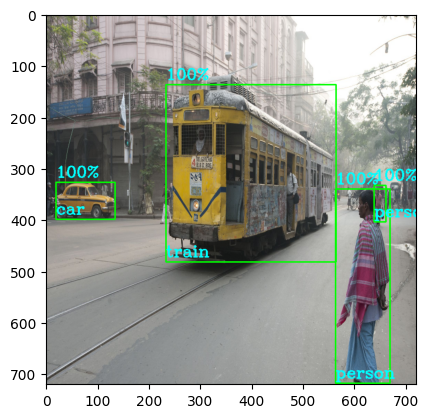

In [46]:
plt.imshow(img_boxes)